In [2]:
"""
K_Means伪代码：
Input: K: # of clusters
       X: samples
Start: Randomly initialize K centroids c_1, c_2, ..., c_k 
While: c_i not converging{
       [step1: update assignment for each sample x_i]
       for i = 1 to m:
           argmin_k(||x_i - c_k||)
       [step2: update centroids]
       for k = 1 to K:
           c_k = mean of points assigned to cluster k
}

存在的问题：
1.类别数量k难以确定
2.怎样初始化簇点： K-Means++

K-Means++:

"""
print()

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

{0: [51, 66], 1: [23, 77], 2: [20, 36]}


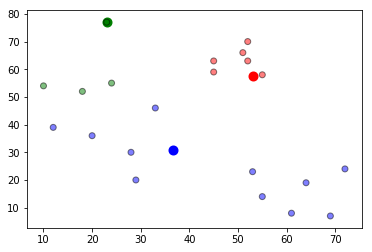

centroids: {0: [53.142857142857146, 57.57142857142857], 1: [23.0, 77.0], 2: [36.61538461538461, 31.0]}


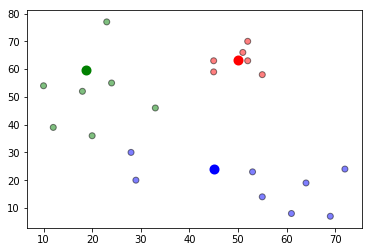

centroids: {0: [50.0, 63.166666666666664], 1: [18.75, 59.5], 2: [45.09090909090909, 24.181818181818183]}


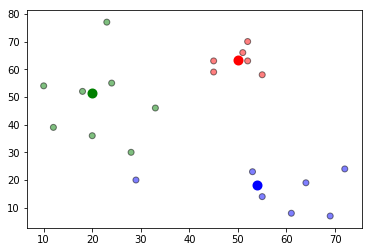

centroids: {0: [50.0, 63.166666666666664], 1: [20.0, 51.285714285714285], 2: [53.875, 18.125]}


In [337]:
def get_closest_distance(df_x, df_y, centroids):
    min_dist = math.inf
    for i in centroids.keys():
        dist = np.sqrt((df_x - centroids[i][0]) ** 2 + (df_y - centroids[i][1]) ** 2)
    if dist < min_dist:
        min_dist = dist
    return min_dist

def init_centroids(df, k):
    """
    K_Means++
    """
    data_num = df.shape[0]
    first_idx =  random.randint(0, data_num-1) # 等价于np.random.randint(0, data_num)
    centroids = dict()
    centroids[0] = [df.loc[first_idx]['x'], df.loc[first_idx]['y']]
    for i in range(1, k):
        total = 0.0
        distance = list()
        for j in range(data_num):
            distance.append(get_closest_distance(df.loc[j]['x'], df.loc[j]['y'], centroids))
            total += distance[j]
        total *= random.random()
        
        for j in range(data_num):
            total -= distance[j]
            if total < 0:
                centroids[i] = [df.loc[j]['x'], df.loc[j]['y']] 
                break
    return centroids


def assignment(df, centroids, colormap):
    # 
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2)
    # set color    
    distance_from_centroid_id = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, distance_from_centroid_id].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # .map() 接受一个函数或含有映射关系的字典型对象,实现元素级转换
    #print(df.closest)
    df['color'] = df['closest'].map(lambda x: colormap[x])
    #print(df.color)
    return df

def update(df, centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
    return centroids

def main():
    df = pd.DataFrame({
        'x': [12, 20, 28, 18, 10, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 23],
        'y':[39, 36, 30, 52, 54, 20, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 77]
    })
   
    # step 0.1: generate center
    #np.random.seed(200)    # in order to fix the random centorids
    k = 3
    centroids = init_centroids(df, k)
#     centroids = {
#         i: [np.random.randint(0, 80), np.random.randint(0, 80)] for i in range(3)
#     }                                                                              # len(centroids)=3

    # step 0.2: assign centroid for each source data
    # for color and mode: https://blog.csdn.net/m0_38103546/article/details/79801487
    # colmap = {0: 'r', 1: 'g', 2: 'b', 3: 'm', 4: 'c'}
    colormap = {0: 'r', 1: 'g', 2: 'b'}
    print(centroids)
    df = assignment(df, centroids, colormap)

    for i in range(10):
        closest_centroids = df['closest'].copy(deep=True) # difference of copy(), deepcopy(), = : https://www.cnblogs.com/awishfullyway/p/6031039.html
        centroids = update(df, centroids)
        df = assignment(df, centroids, colormap)
        if closest_centroids.equals(df['closest']):
            break
        
        plt.figure()
        for i in centroids.keys():
           # print(*centroids[i], centroids[i])
            plt.scatter(*centroids[i], color=colormap[i], linewidths=4) # linewidths: 原点大小
        plt.scatter(df.x, df.y, color=df.color, alpha=0.5, edgecolor='k') # alpha: 透明度
        plt.show()
        print('centroids:', centroids)
        
    
if __name__ == "__main__":
    main()

In [316]:
"""
DataFrame.idxmin(axis=0, skipna=True)[source]
Return index of first occurrence of minimum over requested axis. NA/null values are excluded.

Parameters:
    axis : {0 or ‘index’, 1 or ‘columns’}, default 0

    0 or ‘index’ for row-wise, 1 or ‘columns’ for column-wise

    skipna : boolean, default True

    Exclude NA/null values. If an entire row/column is NA, the result will be NA.

Returns: 
    idxmin : Series

Raises: 
    ValueError, if the row/column is empty
"""
print()